In [1]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install -U bioinfokit

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from bioinfokit.visuz import cluster


In [4]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\Documents\Data Science\feynn

06/14/2024  02:23 PM    <DIR>          .
06/14/2024  02:23 PM    <DIR>          ..
06/12/2024  11:36 AM    <DIR>          .ipynb_checkpoints
06/09/2024  08:17 PM            49,433 4-wheeler-EV-carwale.csv
06/14/2024  02:23 PM           733,052 EV customer reviews.ipynb
06/14/2024  02:12 PM           879,936 MacD_Market_Segmentation_case_study.ipynb
05/23/2024  03:55 PM            96,988 mcdonalds.csv
06/01/2024  11:51 AM           901,524 Sayali_Hatwar_Market_Segmentation_case_study.ipynb
               5 File(s)      2,660,933 bytes
               3 Dir(s)  76,829,724,672 bytes free


In [5]:
df = pd.read_csv('4-wheeler-EV-carwale.csv')
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [6]:
df.isna().sum()

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [7]:
df = pd.DataFrame(df)

# Adding Column 
df['Id'] = range(1,len(df)+1)

In [8]:
# Move the last column to the first position
last_column = df.pop(df.columns[-1])  # Extract the last column
df.insert(0, last_column.name, last_column)  # Insert it into the first position
df.head()

,Id,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,1,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,2,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,3,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,4,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,5,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [9]:
df.shape

(129, 11)

In [10]:
df.columns

Index(['Id', 'review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               129 non-null    int64  
 1   review           129 non-null    object 
 2   Exterior         129 non-null    float64
 3   Comfort          129 non-null    float64
 4   Performance      129 non-null    float64
 5   Fuel Economy     129 non-null    float64
 6   Value for Money  129 non-null    float64
 7   Condition        129 non-null    object 
 8   driven           129 non-null    object 
 9   rating           129 non-null    float64
 10  model_name       129 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 11.2+ KB


## Sentiment Analysis
- Analyse the sentiment score for each and overall reviews of dataset.

In [12]:
# Calculate sentiment score for each review
sentiment_scores = [TextBlob(review).sentiment.polarity for review in df['review']]

# Calculate overall sentiment score for the dataset
overall_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)

print("Overall Sentiment Score:", overall_sentiment_score)


Overall Sentiment Score: 0.36300056328722496


- Overall sentiment score of our dataset of electric cars is 0.363 which is greater than 0 that means the response is positive but not too good.

In [13]:
# Lets see porarity for individual reviews
sia = SentimentIntensityAnalyzer()

In [14]:
# Run polarity scores on entire dataset

from tqdm import tqdm
dic = {}

for i, row in tqdm(df.iterrows(),total=len(df)):
    text = str(row['review'])
    myid = row['Id']
    dic[myid]=sia.polarity_scores(text)


100%|███████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<00:00, 819.78it/s]


In [15]:
# sentiment score with the help of vaders sentiment scoring
vaders = pd.DataFrame(dic).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
review_column = vaders.pop(vaders.columns[5])  # Extract the last column
vaders.insert(1, review_column.name, review_column)  # Insert it into the first position
vaders.head()

,Id,review,neg,neu,pos,compound,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,1,Superb car like as fantastic as petroleum car....,0.000,0.571,0.429,0.9729,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,2,"Anti national, worst service, worst customer c...",0.360,0.518,0.121,-0.8928,1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,3,Super happy with it. The car is too good,0.000,0.364,0.636,0.8885,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,4,"Pretty good car, smooth as a glider fast car, ...",0.000,0.704,0.296,0.9231,5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,5,Price difference between petrol and electronic...,0.031,0.918,0.051,0.2869,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [16]:

sentiment_data = [
    [vaders['neg'].mean(), vaders['neu'].mean(), vaders['pos'].mean(), vaders['compound'].mean()]
]

# Create DataFrame
sentiment_means_df = pd.DataFrame(sentiment_data, columns=['neg', 'neu', 'pos', 'compound'])

print(sentiment_means_df)


        neg       neu       pos  compound
0  0.029124  0.718054  0.252798  0.712257


#### Now lets focus on numerical data

In [17]:
df['Comfort'].value_counts()

5.0    85
4.0    28
3.0     7
1.0     4
2.0     4
0.0     1
Name: Comfort, dtype: int64

In [18]:
df['Performance'].value_counts()

5.0    93
4.0    17
3.0     8
1.0     7
2.0     3
0.0     1
Name: Performance, dtype: int64

In [19]:
df['Fuel Economy'].value_counts()

5.0    91
4.0    19
3.0    10
1.0     7
0.0     1
2.0     1
Name: Fuel Economy, dtype: int64

In [20]:
df['Value for Money'].value_counts()

5.0    84
4.0    14
2.0    11
3.0    10
1.0     9
0.0     1
Name: Value for Money, dtype: int64

In [21]:
df['Condition'].value_counts()

New              63
Not Purchased    46
Used             20
Name: Condition, dtype: int64

In [22]:
df['driven'].value_counts()

Did a short drive once     37
Few thousand kilometers    34
Few hundred kilometers     31
Haven't driven it          25
Its my mate since ages      2
Name: driven, dtype: int64

In [23]:
df['model_name'].value_counts()

tata nexon ev    75
hyundai kona     34
tata tigor ev    20
Name: model_name, dtype: int64

In [24]:
df['rating'].value_counts()

5.0    95
4.0    14
0.0     9
3.0     7
2.0     4
Name: rating, dtype: int64

In [25]:
# Select only float and integer columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

print(df_numeric.head())

   Id  Exterior  Comfort  Performance  Fuel Economy  Value for Money  rating
0   1       5.0      4.0          5.0           5.0              5.0     5.0
1   2       1.0      1.0          1.0           1.0              1.0     0.0
2   3       4.0      5.0          5.0           5.0              4.0     5.0
3   4       5.0      5.0          5.0           5.0              5.0     5.0
4   5       4.0      4.0          5.0           3.0              2.0     3.0


In [26]:
df_num = df_numeric.drop(['Id'],axis=1)

In [27]:
labelencoder = LabelEncoder()
df1_numeric = df_num.apply(labelencoder.fit_transform)
df1_numeric

<IPython.core.display.Javascript object>

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,5,4,5,5,5,4
1,1,1,1,1,1,0
2,4,5,5,5,4,4
3,5,5,5,5,5,4
4,4,4,5,3,2,2
...,...,...,...,...,...,...
124,5,4,4,4,3,3
125,5,5,5,5,5,4
126,5,5,5,5,5,4
127,4,4,4,5,5,4


In [28]:
df1_numeric.dtypes

Exterior           int64
Comfort            int64
Performance        int64
Fuel Economy       int64
Value for Money    int64
rating             int64
dtype: object

In [29]:
data = {'Column_mean':df1_numeric.mean()}
df_mean = pd.DataFrame(data)
df_mean

,Column_mean
Exterior,4.472868
Comfort,4.418605
Performance,4.418605
Fuel Economy,4.418605
Value for Money,4.162791
rating,3.410853


In [30]:
# Calculate column means
column_mean = df1_numeric.mean()
column_name = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money','rating']

# Create DataFrame
means_df = pd.DataFrame([column_mean], columns=column_name)


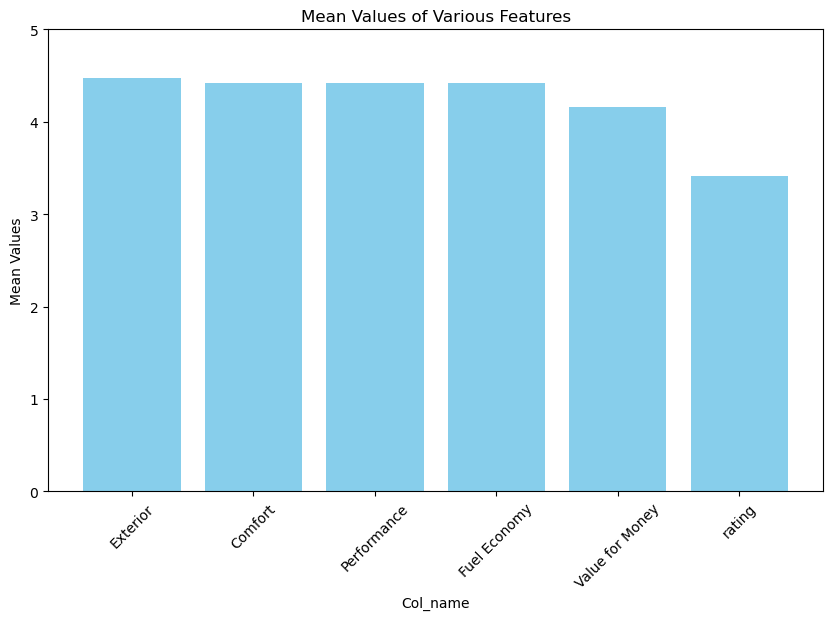

In [31]:
# Create bar plot
columns = (['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money','rating']) 
plt.figure(figsize=(10, 6))
plt.bar(means_df.columns, means_df.values[0], color='skyblue')  # Access column names directly
plt.xlabel('Col_name')
plt.ylabel('Mean Values')
plt.title('Mean Values of Various Features')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Set the y-axis limit to make it more readable
plt.show()

## PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()

In [34]:
pca = PCA()
MD_pca=pca.fit_transform(df1_numeric)
MD_pca

array([[ 1.14846684e+00,  3.36108572e-01,  3.92284299e-01,
         1.20200840e-01,  3.91887411e-02, -7.58509579e-01],
       [-8.19681812e+00,  2.90385387e-01,  1.01902879e+00,
        -3.76225200e-01,  5.40208328e-01,  1.20859632e-01],
       [ 6.85410636e-01,  1.30381416e-01, -1.06795801e-01,
         8.05089208e-01,  1.80458541e-01,  6.57521884e-01],
       [ 1.52594827e+00,  2.29417919e-02,  4.30913363e-02,
        -8.21513122e-02, -4.70297655e-02,  9.03103166e-03],
       [-2.26120048e+00, -7.38652595e-01, -1.29886686e+00,
         3.92600594e-01,  1.38317890e+00, -6.67337895e-02],
       [ 2.69902884e-01,  4.88962119e-01,  1.12511637e-01,
         8.86772669e-01,  3.51121750e-02, -1.49256641e+00],
       [ 1.52594827e+00,  2.29417919e-02,  4.30913363e-02,
        -8.21513122e-02, -4.70297655e-02,  9.03103166e-03],
       [ 1.52594827e+00,  2.29417919e-02,  4.30913363e-02,
        -8.21513122e-02, -4.70297655e-02,  9.03103166e-03],
       [ 1.52594827e+00,  2.29417919e-02,  4.309

In [35]:
explained_variance = pca.explained_variance_ratio_
standard_deviation = np.sqrt(pca.explained_variance_)
cumulative_proportion = np.cumsum(explained_variance)

In [36]:
# Create a list of index labels for the DataFrame
index = []
for i in range(len(standard_deviation)):
    i = i + 1
    index.append("PC{}".format(i))


pca_summary = pd.DataFrame({
    'Standard deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_proportion
},index)
print(pca_summary)


     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.493813                0.798322               0.798322
PC2            0.785813                0.079266               0.877589
PC3            0.612596                0.048173               0.925761
PC4            0.506236                0.032897               0.958658
PC5            0.452907                0.026331               0.984989
PC6            0.341960                0.015011               1.000000


In [37]:
# Create a rotation matrix
# The rotation matrix is a matrix that contains the factor loadings for each principal component.
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=df1_numeric.columns.values, columns=index)

In [38]:
print(standard_deviation.round(1))

[2.5 0.8 0.6 0.5 0.5 0.3]


In [39]:
print(loadings_df.round(3))

                   PC1    PC2    PC3    PC4    PC5    PC6
Exterior         0.339 -0.268 -0.479 -0.323 -0.318 -0.615
Comfort          0.377 -0.313 -0.349 -0.202 -0.086  0.768
Performance      0.429 -0.077 -0.186  0.291  0.815 -0.159
Fuel Economy     0.398 -0.379  0.393  0.625 -0.388 -0.050
Value for Money  0.501  0.160  0.629 -0.564  0.090 -0.033
rating           0.386  0.809 -0.252  0.247 -0.260  0.062


In [40]:
loadings_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.405115,-0.011143,-0.040664,0.012253,-0.024468,-0.004660
std,0.055299,0.447047,0.444990,0.447012,0.446410,0.447184
min,0.339455,-0.378665,-0.479078,-0.564220,-0.388199,-0.615007
25%,0.379591,-0.301813,-0.324846,-0.292854,-0.303424,-0.131602
50%,0.391741,-0.172397,-0.219075,0.022173,-0.173283,-0.041673
75%,0.421283,0.100975,0.248518,0.280278,0.046167,0.037907
max,0.501083,0.809452,0.628966,0.624941,0.815443,0.767541


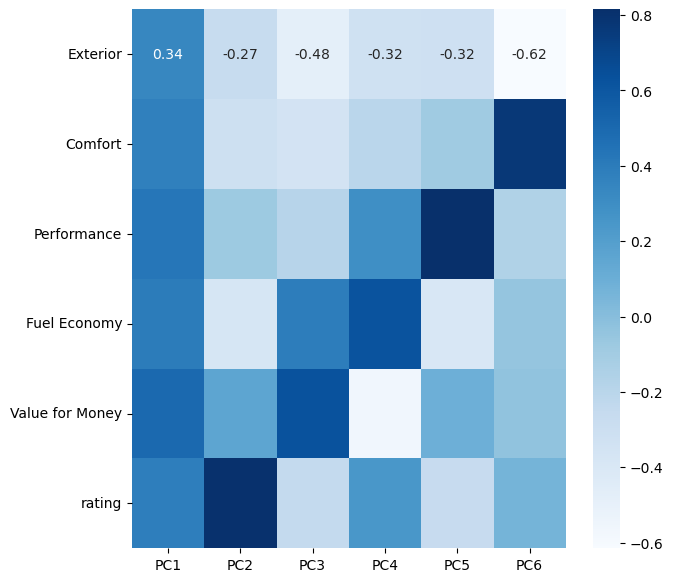

In [41]:
# Plot heatmap showing relation between variables
plt.figure(figsize=(7,7))
sns.heatmap(loadings_df,annot=True, cmap='Blues')
plt.show()

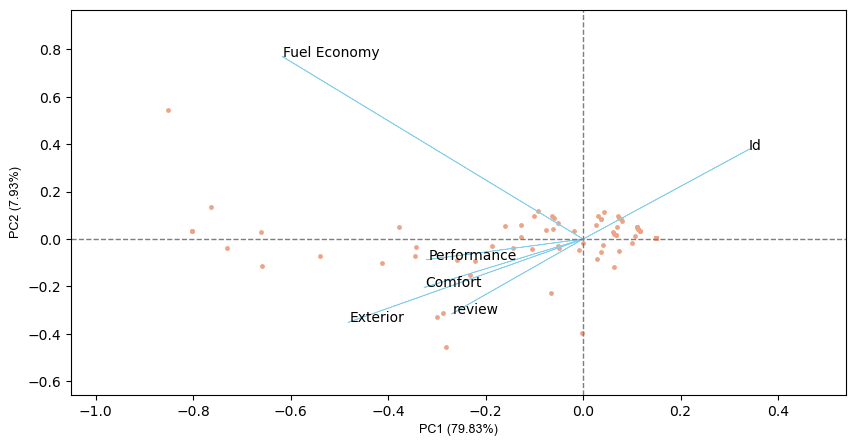

In [42]:
# get 2D biplot

#The biplot function is used to create a biplot, which is a graphical representation of the relationship between the principal components
# and the observed variables.

cluster.biplot(cscore=MD_pca, loadings=loadings, labels=df.columns.values,
            var1=round(explained_variance[0]*100, 2),
    var2=round(explained_variance[1]*100, 2),show=True,dim=(10,5))
plt.show()

- Biplot shows a perceptual map of 4-wheeler electric car attributes. Negative attributes like performance, Comfort, Id, Review and Fuel Economy are grouped, while positive ones like Exterior are on the opposite side. Consumers cluster into three groups based on their view of Performance.

- 
These insights are valuable for identifying consumer segments, highlighting strong attribute relationships and the importance of price.

## Kmeans Clustering

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [44]:
#pip install --upgrade scikit-learn numpy threadpoolctl

In [45]:
np.random.seed(1234)
within_cluster_distance = []
k_range = range(1, 9)
kmeans_results = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df1_numeric)
    within_cluster_distance.append(kmeans.inertia_)
    kmeans_results[str(k)] = kmeans

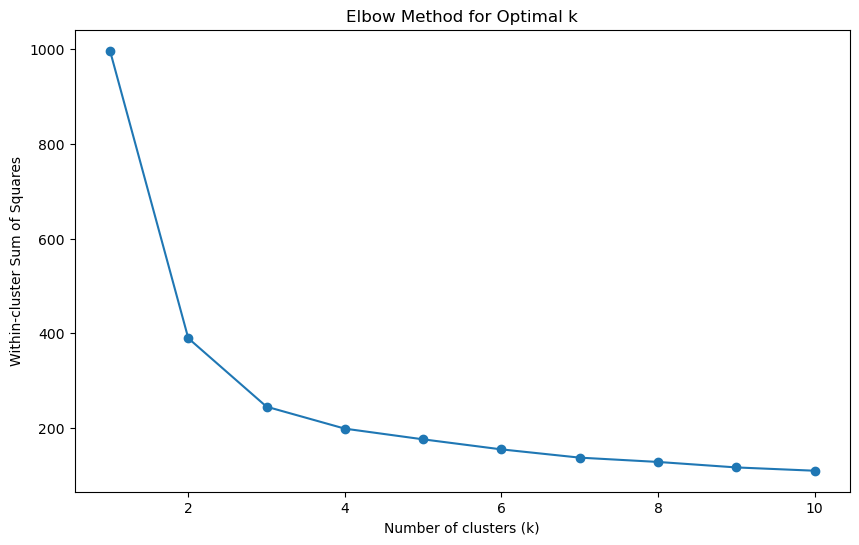

In [46]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method 
# Assuming df1_numeric is your numeric dataframe
k_range = range(1, 11)
within_cluster_distance = []
kmeans_results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df1_numeric)
    within_cluster_distance.append(kmeans.inertia_)
    kmeans_results[str(k)] = kmeans

# Example plot to show the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, within_cluster_distance, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()


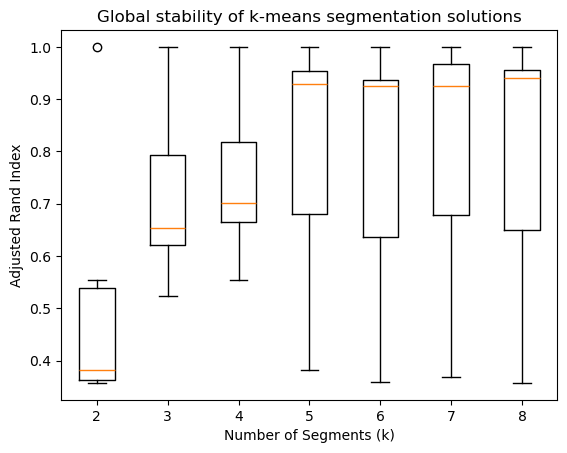

In [47]:
#Conduct  the analysis for each number of segments (between two and eight)
#using 2 × 100 bootstrap samples
#and ten random initialisations of k-means for each sample and number of segments.

from sklearn.metrics import adjusted_rand_score
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(df1_numeric)
    results[str(k)] = kmeans_labels
    df['Cluster Number'] = kmeans_labels

# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)

# Create a box plot
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global stability of k-means segmentation solutions')
plt.show()

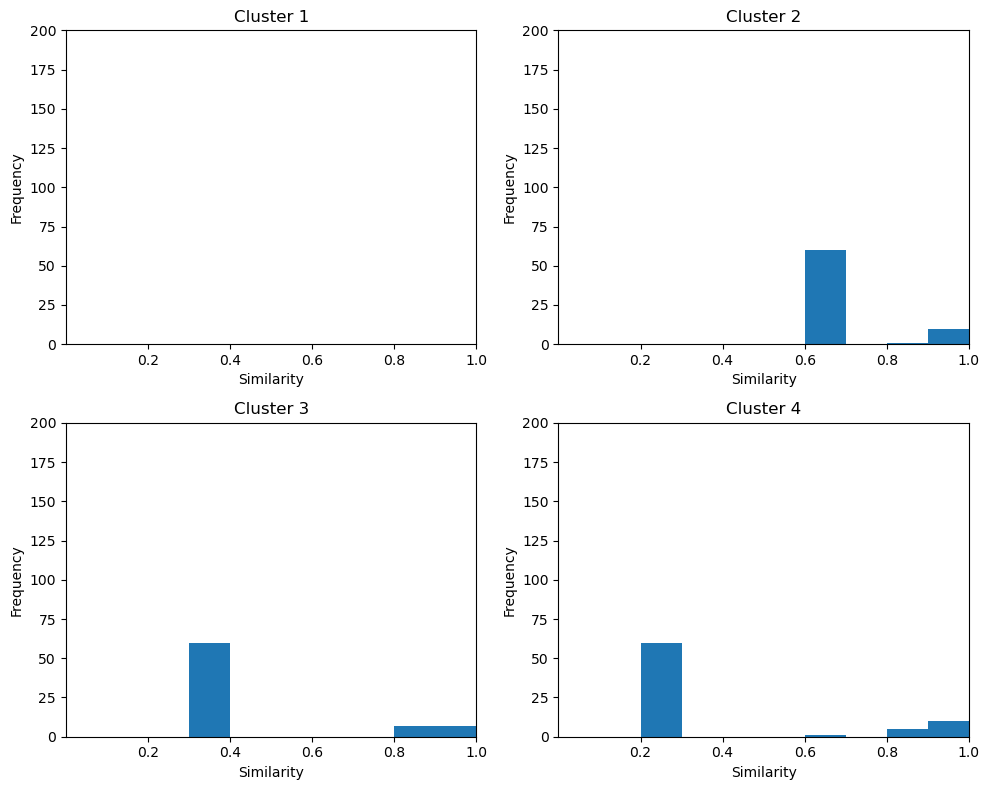

In [48]:
import matplotlib.pyplot as plt

# Define the range of values and the number of bins for the histogram.
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create a figure with subplots for each cluster.
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# For each cluster, calculate the similarities between the points in the cluster and the cluster centroid.
for i in range(1, 5):

    similarities = kmeans_results[str(i)].transform(df1_numeric).min(axis=1)

    # Plot the histogram of the similarities.
    row = (i - 1)//2
    col =  (i-1) % 2
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the labels, title, and limits.
    axs[row, col].set(xlabel='Similarity', ylabel='Frequency', title=f'Cluster {i}', xlim=range_values, ylim=(0, max_frequency))
    axs[row, col].set_xticks([0.2, 0.4, 0.6, 0.8,1.0])

# Tighten the layout of the figure.
plt.tight_layout()
plt.show()


## Using mixture of distribution

In [49]:
# using Gaussian Mixture Models for clustering, evaluating information criteria, and comparing cluster assignments
# from different methods.
# Fit Gaussian Mixture Model for each k and collect criteria

from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    random_state=1234
)
gmm.fit(df1_numeric)

cluster_assignments_gmm = gmm.predict(df1_numeric)

model = KMeans(
    n_clusters=4,
    n_init=10,
    random_state=0
)
model.fit(df1_numeric)
labels = model.predict(df1_numeric)

conf_matrix = confusion_matrix(
    labels,
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0 69 23  0]
 [ 0  0  0  8]
 [10  0  0  0]
 [ 3  0 16  0]]


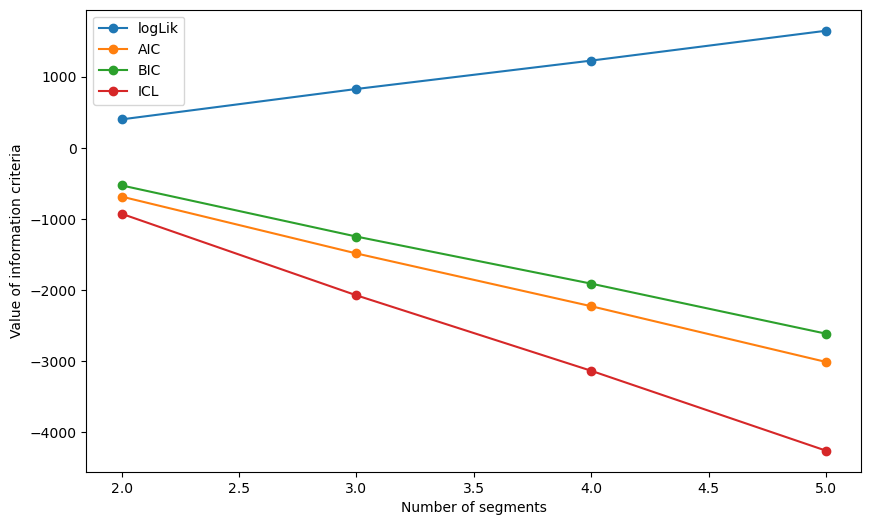

In [50]:
k_range = range(2, 6)
gmm_results = {}
criteria = {'logLik': [], 'AIC': [], 'BIC': [], 'ICL': []}

for k in k_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(df1_numeric)
    gmm_results[k] = gmm
    criteria['logLik'].append(gmm.lower_bound_ * df1_numeric.shape[0])
    criteria['AIC'].append(gmm.aic(df1_numeric))
    criteria['BIC'].append(gmm.bic(df1_numeric))
    # ICL is approximated as BIC - logLik for simplicity
    criteria['ICL'].append(gmm.bic(df1_numeric) - gmm.lower_bound_ * df1_numeric.shape[0])

# Plot information criteria
plt.figure(figsize=(10, 6))
for crit in criteria:
    plt.plot(k_range, criteria[crit], marker='o', label=crit)
plt.xlabel('Number of segments')
plt.ylabel('Value of information criteria')
plt.legend()
plt.show()

## Profiling Segmentation

In [51]:
MD_mean = df1_numeric.groupby(labels).mean()
print(MD_mean)

   Exterior   Comfort  Performance  Fuel Economy  Value for Money    rating
0  4.847826  4.836957     4.923913      4.880435         4.913043  3.891304
1  1.500000  1.250000     0.875000      1.000000         0.875000  0.750000
2  3.900000  3.500000     2.900000      3.600000         2.000000  1.200000
3  4.210526  4.210526     4.263158      4.052632         3.052632  3.368421


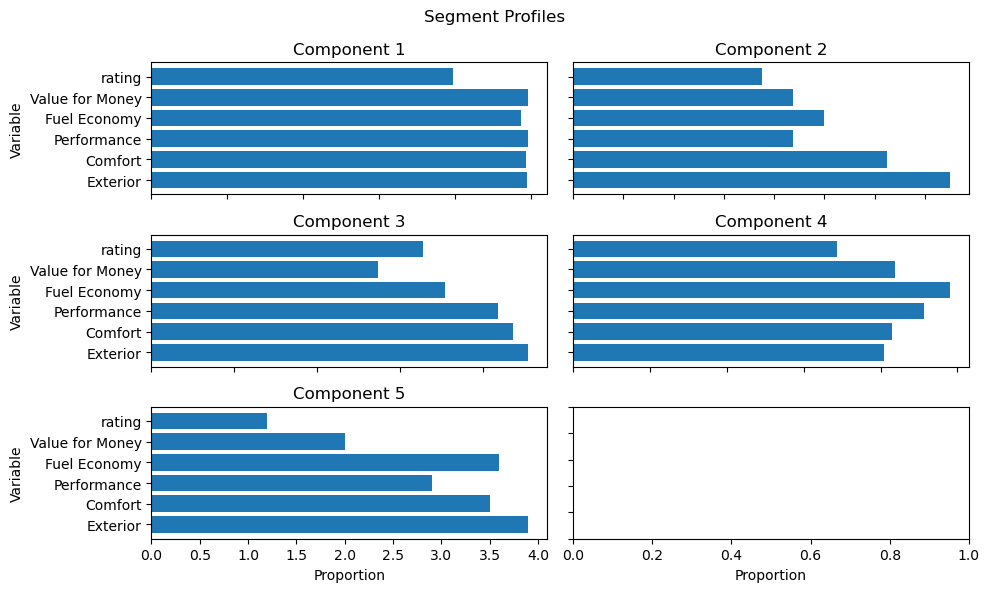

In [52]:
#Six market segments have been identified through segmentation analysis.
#To understand their meaning, a segment profile plot is generated.
#This plot highlights key characteristics of each segment and reveals differences between them.
# To enhance interpretability, hierarchical cluster analysis is applied to attributes, grouping similar ones together for clearer
#insights into each segment's characteristics.
# Select the k-means model with 4 clusters
kmeans = kmeans_results['5']

# label the assigned clusters by kmeans
labels = kmeans.labels_

# Group the data 'MD' by the cluster labels and calculate the mean of each cluster
MD_mean = df1_numeric.groupby(labels).mean()

# Create a 2x2 subplot figure with a size of 10x6 inches
fig, axs = plt.subplots(3, 2, figsize=(10, 6))

# Create horizontal bar plots for each cluster's mean values on separate subplots
# and set titles for each subplot accordingly
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')
axs[2, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[4])
axs[2, 0].set_title('Component 5')

# Set common labels and ticks for all subplots
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(df1_numeric.columns)

# Hide labels on inner subplots
for ax in axs.flat:
    ax.label_outer()


fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

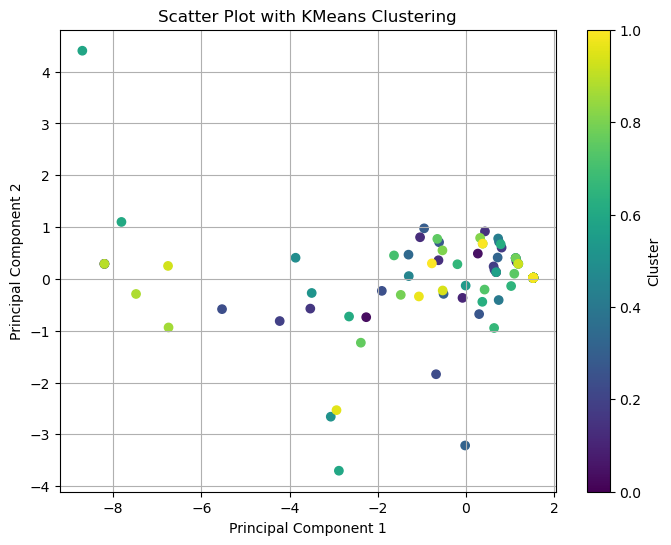

In [53]:
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
color_sequence = cm.viridis(np.linspace(0, 1, len(MD_pca)))
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=color_sequence, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot with KMeans Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Describing Segments

In [54]:
t = pd.read_csv('4-wheeler-EV-carwale.csv')
t.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


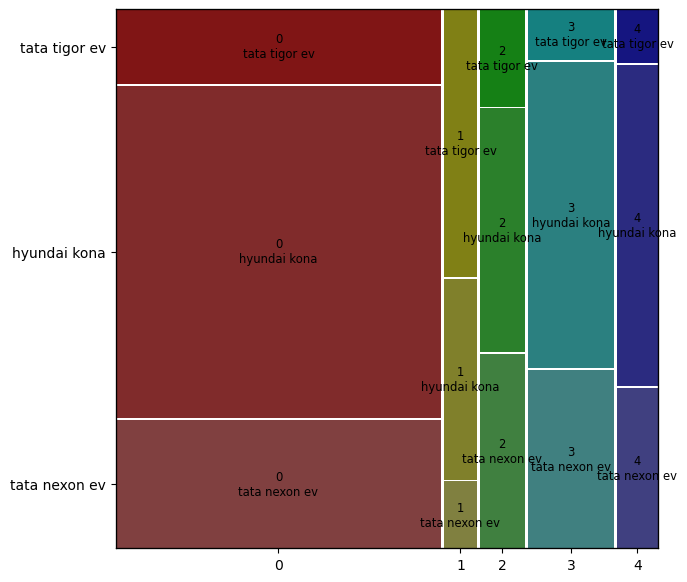

In [66]:
#The 4-wheeler electric car dataset lacks sufficient descriptor variables typically used in market segmentation analysis.
# One available descriptor variable is consumers' choice for car model.
# By using a mosaic plot, we visualize the relationship between segment membership and this variable.
# We extract segment membership for each consumer, cross-tabulate it with the cluster_num and model_name variable,
# and generate the mosaic plot with shaded cells indicating deviations from expected frequencies if variables are unassociated.

from statsmodels.graphics.mosaicplot import mosaic

t['cluster_num'] = kmeans.labels_

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(t['cluster_num'], t['model_name'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab.columns = ["tata nexon ev","hyundai kona","tata tigor ev"]

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()



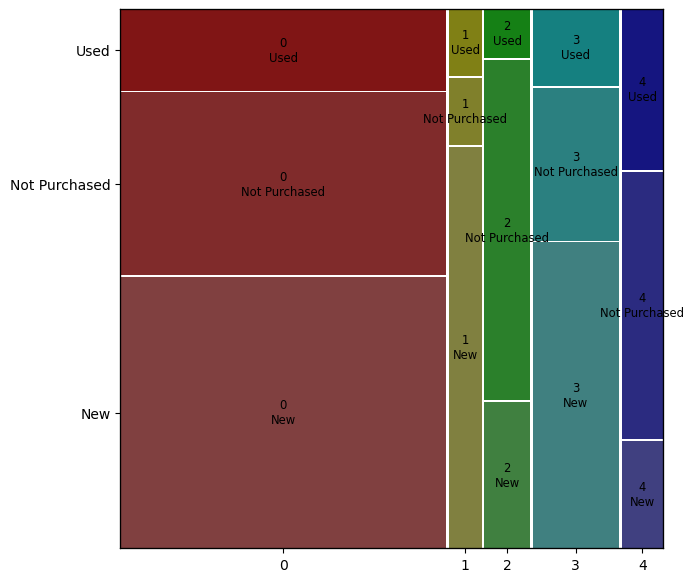

In [57]:
#The 4-wheeler electric car dataset lacks sufficient descriptor variables typically used in market segmentation analysis.
# One available descriptor variable is consumers' choice for car conditions.
# By using a mosaic plot, we visualize the relationship between segment membership and this variable.
# We extract segment membership for each consumer, cross-tabulate it with the cluster_num and conditions variable,
# and generate the mosaic plot with shaded cells indicating deviations from expected frequencies if variables are unassociated.

from statsmodels.graphics.mosaicplot import mosaic

t['cluster_num'] = kmeans.labels_

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(t['cluster_num'], t['Condition'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab.columns = ["New","Not Purchased","Used"]

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()



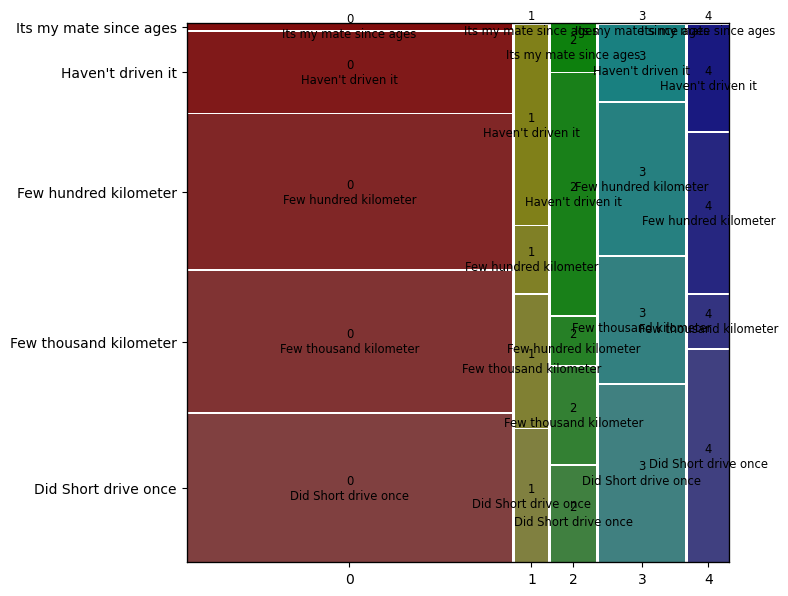

In [58]:
# The 4-wheeler electric car dataset lacks sufficient descriptor variables typically used in market segmentation analysis.
# One available descriptor variable is consumers driven feature.
# By using a mosaic plot, we visualize the relationship between segment membership and this variable.
# We extract segment membership for each consumer, cross-tabulate it with the cluster_num and driven variable,
# and generate the mosaic plot with shaded cells indicating deviations from expected frequencies if variables are unassociated.

from statsmodels.graphics.mosaicplot import mosaic

t['cluster_num'] = kmeans.labels_

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(t['cluster_num'], t['driven'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab.columns = ["Did Short drive once","Few thousand kilometer","Few hundred kilometer","Haven't driven it","Its my mate since ages"]

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
plt.show()



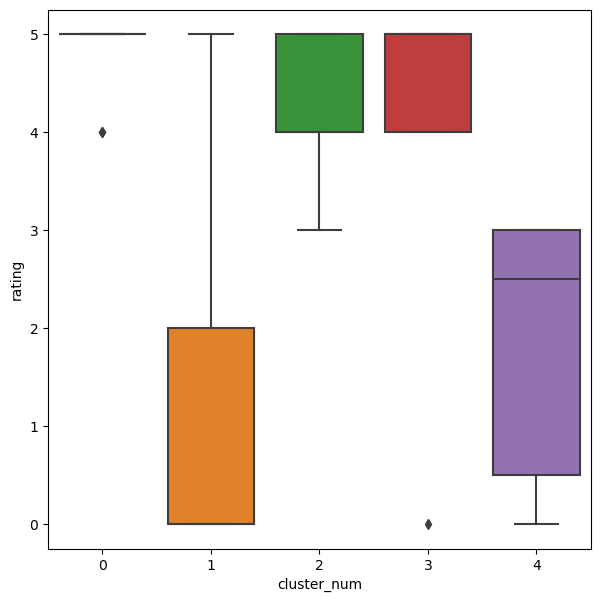

In [59]:
sns.boxplot(x='cluster_num',y='rating',data=t)
plt.show()

## Selecting target Segment

In [55]:
t['model_name'].value_counts()

tata nexon ev    75
hyundai kona     34
tata tigor ev    20
Name: model_name, dtype: int64

In [67]:
t['driven'] = LabelEncoder().fit_transform(t['driven'])

# Group the data by 'cluster_num' and calculate the mean of 'Like' within each cluster
driven = t.groupby('cluster_num')['driven'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Like'
driven = driven.to_frame().reset_index()
driven

<IPython.core.display.Javascript object>

,cluster_num,driven
0,0,1.354430
1,1,1.625000
2,2,2.090909
3,3,1.238095
4,4,1.300000


In [68]:
t['model_name'] = LabelEncoder().fit_transform(t['model_name'])

# Group the data by 'cluster_num' and calculate the mean of 'Like' within each cluster
car_model = t.groupby('cluster_num')['model_name'].mean()

# Convert the resulting series to a DataFrame, then reset the index to make
# 'cluster_num' a regular column in the DataFrame named 'Like'
car_model = car_model.to_frame().reset_index()
car_model

<IPython.core.display.Javascript object>

,cluster_num,model_name
0,0,0.898734
1,1,1.375000
2,2,0.818182
3,3,0.761905
4,4,0.800000


In [69]:
df_target = pd.DataFrame({
    'driven': driven['driven'],
    'Car_model': car_model['model_name']})
print(df_target)

     driven  Car_model
0  1.354430   0.898734
1  1.625000   1.375000
2  2.090909   0.818182
3  1.238095   0.761905
4  1.300000   0.800000


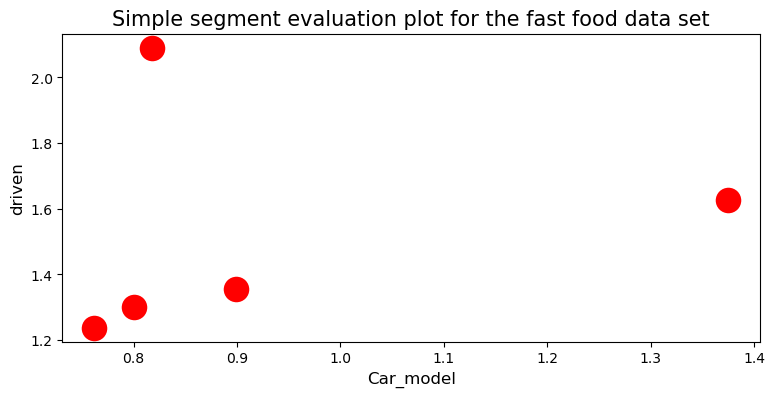

In [70]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "Car_model", y = "driven", data=df_target, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Car_model", fontsize = 12)
plt.ylabel("driven", fontsize = 12)
plt.show()

Customer reviews for electric cars, particularly the Tata Nexon EV, are overwhelmingly positive, indicating a strong preference among consumers. However, despite the growing market for electric vehicles in India, there are significant challenges ahead. The main hurdles include the lack of financial support and necessary infrastructure required for widespread adoption of electric vehicles. While the demand is evident, there's a long road ahead for the electric vehicle market in India to overcome these barriers and reach its full potential.